In [4]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd

In [5]:
# критерий стюдента для независимых выборок
from  statsmodels.stats.weightstats import ttest_ind

# пакет для работы с множественным тестированием
from statsmodels.stats.multitest import multipletests

In [6]:
text_size = 28
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = text_size
plt.rcParams['ytick.labelsize'] = text_size
plt.rcParams['legend.fontsize'] = text_size
plt.rcParams['axes.titlesize'] = text_size
plt.rcParams['axes.labelsize'] = text_size
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams['font.size'] = text_size

# Лейкоциты и астма

С использованием ДНК-микрочипов были получены анализ изменения генной экспрессии для двух групп детей: больных астмой и здоровых.

Источник данных: http://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS4896

## Рассмотрим сами данные

In [7]:
data = pd.read_csv('./expression.csv', delimiter=';')

In [9]:
data.head()

,ID_REF,IDENTIFIER,Healthy control,Healthy control.1,Healthy control.2,Healthy control.3,Healthy control.4,Healthy control.5,Healthy control.6,Healthy control.7,...,Severe asthma.8,Severe asthma.9,Severe asthma.10,Severe asthma.11,Severe asthma.12,Severe asthma.13,Severe asthma.14,Severe asthma.15,Severe asthma.16,Gene title
0,7933640,A1CF,4.24505,4.44464,4.36671,4.33497,4.45717,4.37972,4.40154,4.40521,...,4.59426,4.56012,4.60672,4.43026,4.55835,4.25656,4.52559,4.42976,4.37098,APOBEC1 complementation factor
1,7960947,A2M,4.79868,4.76833,4.66414,4.80272,4.85779,4.77622,4.92634,4.88576,...,5.01994,5.15406,5.13639,4.99052,4.88454,4.68904,4.85329,5.05764,5.48561,alpha-2-macroglobulin
2,7953775,A2ML1,4.79161,5.12633,4.93860,4.74597,4.91789,4.74453,5.23725,4.83903,...,5.22915,5.11131,5.33257,5.05544,4.96971,4.96505,4.76993,5.04489,4.70002,alpha-2-macroglobulin-like 1
3,8076497,A4GALT,5.79783,5.93942,5.82935,5.91139,5.60195,5.68317,6.01254,5.84921,...,6.16251,6.21829,6.06835,5.80154,6.06533,5.79955,5.94065,6.08192,5.86693,"alpha 1,4-galactosyltransferase"
4,8090955,A4GNT,3.79685,4.00154,3.83103,3.91021,3.81930,3.86203,3.97020,3.84166,...,4.17925,3.99698,4.09657,4.00232,3.70843,3.79290,4.31364,3.94925,3.62481,"alpha-1,4-N-acetylglucosaminyltransferase"


In [9]:
 len(data) # кол-во гипотез

28231

In [7]:
list(data.columns)

['ID_REF',
 'IDENTIFIER',
 'Healthy control',
 'Healthy control.1',
 'Healthy control.2',
 'Healthy control.3',
 'Healthy control.4',
 'Healthy control.5',
 'Healthy control.6',
 'Healthy control.7',
 'Healthy control.8',
 'Healthy control.9',
 'Healthy control.10',
 'Healthy control.11',
 'Healthy control.12',
 'Healthy control.13',
 'Healthy control.14',
 'Healthy control.15',
 'Healthy control.16',
 'Healthy control.17',
 'Mild asthma',
 'Mild asthma.1',
 'Mild asthma.2',
 'Mild asthma.3',
 'Mild asthma.4',
 'Mild asthma.5',
 'Mild asthma.6',
 'Mild asthma.7',
 'Mild asthma.8',
 'Mild asthma.9',
 'Mild asthma.10',
 'Mild asthma.11',
 'Mild asthma.12',
 'Mild asthma.13',
 'Mild asthma.14',
 'Mild asthma.15',
 'Mild asthma.16',
 'Mild asthma.17',
 'Mild asthma.18',
 'Severe asthma',
 'Severe asthma.1',
 'Severe asthma.2',
 'Severe asthma.3',
 'Severe asthma.4',
 'Severe asthma.5',
 'Severe asthma.6',
 'Severe asthma.7',
 'Severe asthma.8',
 'Severe asthma.9',
 'Severe asthma.10',
 'Se

## Эксперимент

### Достигаемые уровни значимости в t-Критерии Стьюдента

In [14]:
data_np = data.values
def get_healthy(i):
    '''
    Возвращает всех здоровых пациентов для i-го микрочипа
    '''    
    return data_np[i, 2:20]

def get_asthma(i):
    '''
    Возвращает всех больных астмой пациентов для i-го микрочипа
    '''
    return data_np[i, 39:56]

def get_pvalue_t_test(i):
    '''
    Возвращает p-value для критерия Стьюдента для независимых выборок
    '''
    ### Ваш код тут ###
    return ttest_ind(get_healthy(i),get_asthma(i), alternative='two-sided', usevar = 'unequal')[1]

    

p_values = list(map(get_pvalue_t_test, range(data_np.shape[0])))
p_values = np.array(p_values)

In [15]:
p_values

array([0.23998039, 0.00125341, 0.88390126, ..., 0.15137804, 0.3311369 ,
       0.64441411])

### Модифицированые уровни значимости

In [18]:
p_holm = np.array(multipletests(p_values, method = 'holm')[1])


p_bh = np.array(multipletests(p_values, method = 'fdr_bh')[1])

In [16]:
multipletests?

Распределения исходных и модифицированных достигаемых уровней значимости:

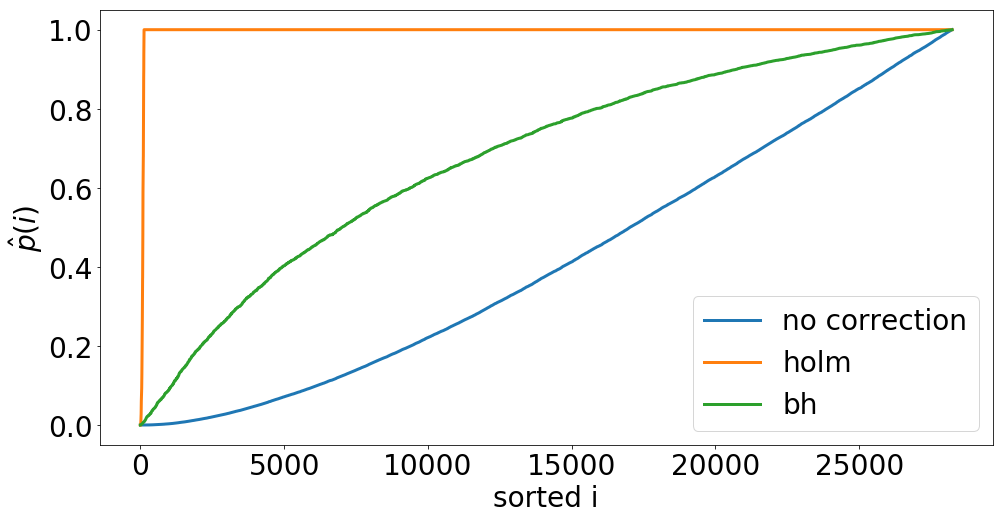

In [22]:
plt.plot(sorted(p_values), label='no correction')

plt.plot(sorted(p_holm), label='holm')

plt.plot(sorted(p_bh), label='bh')
# plt.plot([0, 20000], 0.05)
plt.xlabel('sorted i')
plt.ylabel('$\hat{p}(i)$')
plt.legend(loc='best')
plt.show()

Посчитаем количество генов, экспрессия которых статистически значимо отличается при поправке методами Холма и Бенджамини-Хохберга:

In [23]:
print('Количество генов для которых значимо отличается: {}\t(no correction)'.format((p_values <= 0.05).sum()))
print('Количество генов для которых значимо отличается: {}\t(holm)'.format((p_holm <= 0.05).sum()))
print('Количество генов для которых значимо отличается: {}\t(bh)'.format((p_bh <= 0.05).sum()))

Количество генов для которых значимо отличается: 4087	(no correction)
Количество генов для которых значимо отличается: 31	(holm)
Количество генов для которых значимо отличается: 564	(bh)


На микрочипах есть много проб к малоизученным участкам генома, у которых даже нет названия; их можно сразу удалить из рассмотрения:

In [24]:
reduced_data = data[data['Gene title'].isnull() == False]
reduced_data.shape, data.shape

((21465, 57), (28231, 57))

Рассмотрим как изменились уровни значимости

In [25]:
data_np = reduced_data.values

### Ваш код тут ###
p_values = list(map(get_pvalue_t_test, range(data_np.shape[0])))
p_values = np.array(p_values)

In [26]:
p_holm = np.array(multipletests(p_values, method = 'holm')[1])


p_bh = np.array(multipletests(p_values, method = 'fdr_bh')[1])

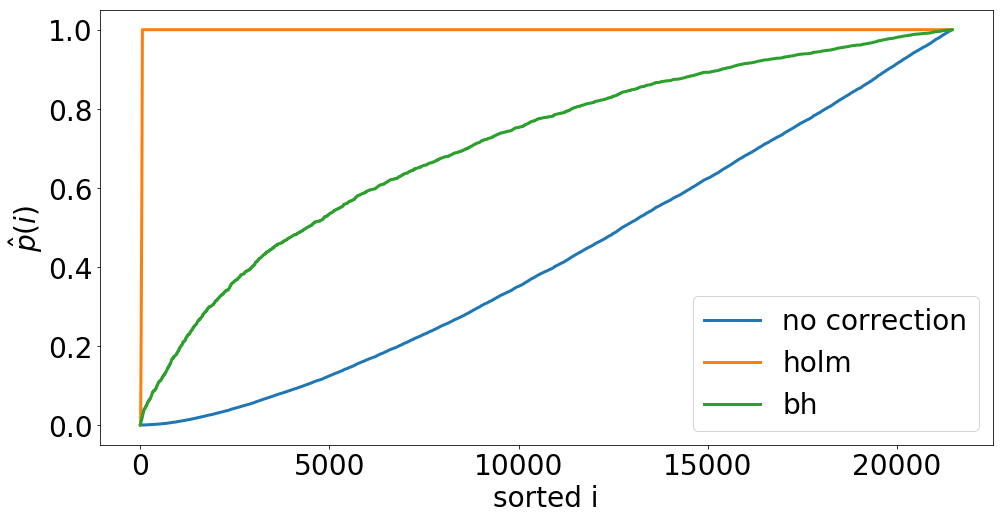

In [27]:
plt.plot(sorted(p_values), label='no correction')

plt.plot(sorted(p_holm), label='holm')

plt.plot(sorted(p_bh), label='bh')

plt.xlabel('sorted i')
plt.ylabel('$\hat{p}(i)$')
plt.legend(loc='best')
plt.show()

In [28]:
print('Количество генов для которых значимо отличается: {}\t(no correction)'.format((p_values <= 0.05).sum()))
print('Количество генов для которых значимо отличается: {}\t(holm)'.format((p_holm <= 0.05).sum()))
print('Количество генов для которых значимо отличается: {}\t(bh)'.format((p_bh <= 0.05).sum()))

Количество генов для которых значимо отличается: 2772	(no correction)
Количество генов для которых значимо отличается: 9	(holm)
Количество генов для которых значимо отличается: 168	(bh)
